<a href="https://colab.research.google.com/github/ibenoam/Neural_cryptography/blob/main/Neural_Cryptography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural-Cryptography:
### Solving the key exchange problem by synchronize Tree Parity Machines

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pdb

In [ ]:
N = 100 # each N input neurons goes to 1 hidden neuron
L = 3 # the "synaptic" depth
K = 3 # number of perceptrons (or hidden layer size)
M = 1 # the input consists of integers between -M to M (without zero)

num_sys = 1000 # we average each result "num_sys" times

step_converage = np.zeros((1,num_sys))
sync_time = np.zeros((1,num_sys))
attacker_time = np.zeros((1,num_sys))

In [ ]:
class TPM:
  def __init__(self,N,K,L,M=1):
    # Constants:
    self.N = N
    self.K = K
    self.L = L
    self.M = M

    # Initialization:
    self.w = np.floor((2*L+1) * np.random.rand(N,K)) - L
    self.init_w = self.w
    self.fields = np.zeros((1,K))
    self.sigmas = np.zeros((1,K))
    self.tau = 0

    # The feed-forward process:
  def forward(self,input):
    self.fields = np.sum(self.w*input, axis=0)
    self.sigmas = np.sign(self.fields + 1e-10)
    self.tau = np.prod(self.sigmas)
  
    # updating the weights:
  def update(self,input):
    update_indexes = np.where(self.sigmas == self.tau)
    self.w[:,update_indexes] += input[:,update_indexes]
    self.w[np.abs(self.w)>self.L] = np.sign(self.w[np.abs(self.w)>self.L])*self.L


In [ ]:
for i in range(num_sys):

    # Creates the objects from the "TPM" class:
    alice = TPM(N,K,L)
    bob = TPM(N,K,L)
    # Creates the attacker's TPM:
    eve = TPM(N,K,L)

    when_move = np.array([])
    corr_alice_bob = np.array([])
    count_steps = 0
    flag = True
    # while not np.array_equal(alice.w,bob.w):
    while not np.array_equal(alice.w,eve.w):
        # print("After {} steps.".format(count_steps))
        count_steps += 1
        if np.array_equal(alice.w,bob.w) and flag:
            sync_time[0, i] = count_steps
            # corr_alice[0, i] = correlation_calc(alice.init_w, alice.w)
            # corr_bob[0, i] = correlation_calc(bob.init_w, bob.w)
            # corr_alice_bob[0, i] = correlation_calc(alice.w, bob.w)
            flag = False
        inputs = np.sign(np.random.rand(N,K)-0.5)
        alice.forward(inputs)
        bob.forward(inputs)
    
        # According to the algorithm, Alice and Bob take a step only when their outputs are identical:
        if alice.tau == bob.tau:
            when_move=np.append(when_move,1)
            alice.update(inputs)
            bob.update(inputs)
            # corr_alice_bob=np.append(corr_alice_bob,np.corrcoef(alice.w[:], bob.w[:]))
        else:
            when_move=np.append(when_move,0)
        
        ''' The best strategy for an attacker with only 1 TPM:
        when Eve gets the same output like Alice- she updates the weights according to the same learning rule.
        But, because of the fact that she cannot influence the dynamics between Alice and Bob, she has to do something
        even when her output is different, otherwise she does not have a real chance.
        So, she looks for the perceptron with the minimal absolute field and flips it (it has the less "confidence").
        Now, her output becomes identical to Alice's output and she can updates according to the regular learning rule.
        '''
        eve.forward(inputs)
        if eve.tau == alice.tau:
            eve.update(inputs)
        else:
            min_field_index = np.argmin(np.abs(eve.fields))
            eve.sigmas[min_field_index] *= -1 # flips a field
            eve.tau *= -1 # now, flips the output
            eve.update(inputs)

    # print(" finished {}% of the runtime".format(100*(i+1)/num_sys))
    attacker_time[0, i] = count_steps
print(" The average synchronization time between Alice and bob is {} steps with std of {}".format(np.mean(sync_time), np.std(sync_time)))
print(" The average learning time between Eve and Alice is {} steps with std of {}".format(np.mean(attacker_time), np.std(attacker_time)))

 The average synchronization time between Alice and bob is 339.95 steps with std of 106.78560530333664
 The average learning time between Eve and Alice is 1881.661 steps with std of 1401.9621906738425


In [ ]:
sync_time


array([[3338., 1828., 4305.,  646.,  682.,  636., 2401., 1623., 1810.,
         919.]])

First, we plotted a histogram of the synchronization time between Alice and bob like in the original paper.

[]

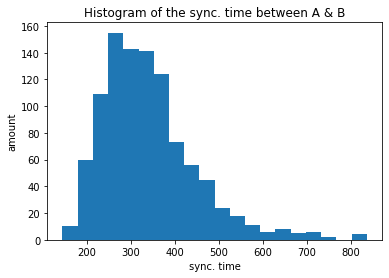

In [ ]:
plt.figure()
plt.hist(np.resize(sync_time, (num_sys,)), bins = 20)
# plt.subplot(121)
plt.title('Histogram of the sync. time between A & B')
plt.xlabel("sync. time")
plt.ylabel("amount")
plt.plot()

[]

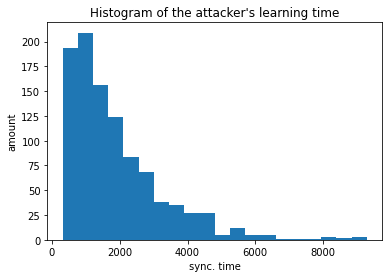

In [ ]:
plt.hist(np.resize(attacker_time, (num_sys,)), bins = 20)
# plt.subplot(122)
plt.title("Histogram of the attacker's learning time")
plt.xlabel("sync. time")
plt.ylabel("amount")
plt.plot()

In [ ]:
# sliding window



In [ ]:
a = np.array([1, 2, 3, 4])
b = np.array([1, 2, 3, 4])
print(np.correlate(a, b))


In [ ]:
def entropy_calc(arr):
  

In [ ]:
# This function gets two sets of weights (flatten each of them to a vector), and calculates the correlation between them (or the cosinus between them).
def correlation_calc(w1, w2):
    w1 = w1.flatten().transpose
    w2 = w2.flatten()
    print(w1)
    print(w2)
    # corr_val = (w1 @ w2) / (np.linalg.norm(w1) * np.linalg.norm(w2))

    return corr_val

In [ ]:
x = np.array([[3], [4]])
np.linalg.norm(x)

5.0

In [ ]:
b = bob.w
b = b.flatten()#.transpose()
# b = b.T
b.shape

(300,)

In [ ]:
corr_val = correlation_calc(alice.w, bob.w)

<built-in method transpose of numpy.ndarray object at 0x7f777ac458a0>
[ 3.  3.  3.  2. -3. -2.  3. -2.  3.  3. -1.  1.  1. -3. -3. -1.  1. -3.
 -1.  3. -3.  2. -2.  3.  1.  0.  2. -1.  2.  3. -2.  0.  0.  1.  3.  2.
  0. -2.  2. -2. -2.  3.  2. -1.  0. -3.  2.  2. -1.  1. -2.  2. -2. -1.
  1.  0.  2.  0.  3.  3.  1.  0. -2. -3.  1. -3.  2.  2.  1. -1.  3.  3.
 -3. -3. -2.  2.  3.  2. -2. -3.  0.  3.  0. -1. -3. -1.  1.  3.  0. -1.
 -3. -2.  1. -3.  2. -3.  1. -3.  3. -3. -3. -1.  2.  0. -3.  3. -1.  0.
  2.  1.  2.  2.  0. -2.  1. -3.  0. -2.  3.  0. -3.  3.  3.  0. -1.  2.
  1.  2. -1.  2.  2.  3. -1. -2. -1. -3.  0.  0.  3. -3.  1. -1. -1.  3.
  3. -1.  1. -2.  3. -3.  2. -2. -3. -1. -2.  3.  0. -2.  2.  2.  3.  1.
 -1.  0. -3.  0.  1. -1. -2. -3.  3.  2.  1.  2.  1. -1. -2.  0.  1. -2.
  1. -3.  1.  3. -1.  0. -2. -3. -1.  2. -3. -2.  2.  3.  1.  1. -1.  0.
 -1.  2.  3. -3.  2.  1.  3.  0.  2. -3.  2. -3. -2.  2.  1.  3. -1. -1.
  0. -1. -3.  1.  3. -3. -2. -1. -2.  3.  1.  1. -1. -

NameError: ignored

In [ ]:
print(alice.w.flatten().shape)

(300,)


### Graphs we want to show:
1. Histogram of the synchronization time between Alice and bob. --- done!
2. The chance of A&B to take a step (sliding window)
3. The correlation between A&B over the learning time (vs. the attacker's correlation)
4. Show how the sync time depends on the constants (N, L, K)- "errorbar"
5. To show that the final weights are not correlated to the initial weights.
6. examine how inputs in [-M, M] affects the information we can get from the final weights.